In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Housing.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [ ]:
data.describe(include="all")

price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545             545             545   
unique        2         2        2               2               2   
top         yes        no       no              no              no   
freq        468       448      354             520             373   
mean        NaN       NaN      NaN             NaN             NaN   
std         NaN       NaN      NaN             NaN             NaN   
min         NaN       NaN      NaN             NaN             NaN   
25%         NaN       NaN      NaN             NaN             NaN   
50%         NaN       NaN      NaN             NaN             NaN   
75%         NaN       NaN      NaN             NaN             NaN   
max         NaN       NaN      NaN             NaN             NaN   

           parking prefarea furnishingstatus  
count   545.000000      545              545  
unique         NaN        2                3  
top            NaN       no   semi-furnished  
freq           NaN      417              227  
mean      0.693578      NaN              NaN  
std       0.861586      NaN              NaN  
min       0.000000      NaN              NaN  
25%       0.000000      NaN              NaN  
50%       0.000000      NaN              NaN  
75%       1.000000      NaN              NaN  
max       3.000000      NaN              NaN

In [ ]:
data.tail()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished

In [ ]:
print(data.isna().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
data.corr()

<ipython-input-39-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000

In [ ]:
data.shape

(545, 13)

In [ ]:
# Data preprocessing
data.dropna(inplace=True)

<Axes: xlabel='price', ylabel='count'>

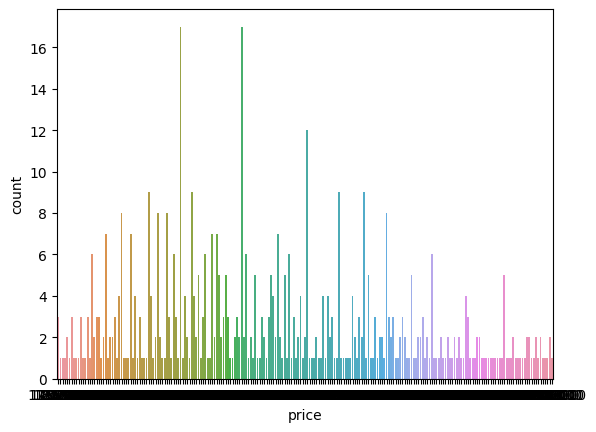

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data,x = 'price')

In [ ]:
# Select relevant features (excluding 'price' and non-numeric columns)
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]


In [ ]:
# Map binary categorical columns to numeric values
#converting categorical columns to distinct categories
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for i in binary_columns:
    X[i] = X[i].map({'yes': 1, 'no': 0}) #based on mapping it contains numeric values

<ipython-input-44-30200b290a54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].map({'yes': 1, 'no': 0}) #based on mapping it contains numeric values
<ipython-input-44-30200b290a54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].map({'yes': 1, 'no': 0}) #based on mapping it contains numeric values
<ipython-input-44-30200b290a54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
# Map 'furnishingstatus' to numeric values (assuming furnished=2, semi-furnished=1, unfurnished=0)
X['furnishingstatus'] = X['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

<ipython-input-45-6de838827af7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['furnishingstatus'] = X['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})


In [ ]:
# Target variable
y = data['price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
#assess performance of model
mae = mean_absolute_error(y_test, y_pred) #avg absolute difference between predicted and actual
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred) #proportion of variance in the target variable

In [ ]:
print("Model Evaluation")
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')


Model Evaluation
Mean Absolute Error (MAE): 979679.69
Mean Squared Error (MSE): 1771751116594.04
Root Mean Squared Error (RMSE): 1331071.42
R-squared (R2) Score: 0.65


In [ ]:
# Predict a house price
sample_data = pd.DataFrame({
    'area': [7420],
    'bedrooms': [4],
    'bathrooms': [2],
    'stories': [3],
    'mainroad': ['yes'],
    'guestroom': ['no'],
    'basement': ['no'],
    'hotwaterheating': ['no'],
    'airconditioning': ['yes'],
    'parking': [2],
    'prefarea': ['yes'],
    'furnishingstatus': ['furnished']
})

In [ ]:
# Map binary categorical columns to numeric values in the sample data
for column in binary_columns:
    sample_data[column] = sample_data[column].map({'yes': 1, 'no': 0})

In [ ]:
# Map 'furnishingstatus' to numeric values in the sample data
sample_data['furnishingstatus'] = sample_data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [ ]:
# Predict the house price for the sample input
predicted_price = model.predict(sample_data)
print(f'Predicted House Price: {predicted_price[0]:.2f}')

Predicted House Price: 8004072.41


In [ ]:
# Input
area = float(input("Enter the area (sqft): "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
stories = int(input("Enter the number of stories: "))
mainroad = input("Enter mainroad(yes or no): ")
guestroom = input("Enter guestroom(Yes or no): ")
basement = input("Enter basement(Yes or no): ")
airconditioining = input("Enter airconditioing(Yes or no): ")
hotwaterheating = input("Enter hotwatering(Yes or no): ")
parking = int(input("Enter parking slots: "))
prefarea = input("Enter prefarea(Yes or no): ")
furnishingstatus = input("Enter status of furnishing(semi or full): ")
# Predict
predicted_price = predict_price(area, bedrooms, bathrooms)
print(f"Predicted Price: {predicted_price:,.2f}")


Enter the area (sqft): 7420
Enter the number of bedrooms: 4
Enter the number of bathrooms: 2
Enter the number of stories: 3
Enter mainroad(yes or no): yes
Enter guestroom(Yes or no): no
Enter basement(Yes or no): no
Enter airconditioing(Yes or no): yes
Enter hotwatering(Yes or no): no
Enter parking slots: 2
Enter prefarea(Yes or no): yes
Enter status of furnishing(semi or full): furnished


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the dataset
houses = pd.read_csv("/content/drive/MyDrive/Housing.csv")

# Data Preprocessing
houses['price'] = houses['price'].astype(float)
houses['area'] = houses['area'].astype(float)

# Drop duplicates
houses = houses.drop_duplicates()

# Encode categorical variables
dum_basement = pd.get_dummies(houses['basement'], drop_first=True)
dum_basement.rename(columns={'yes': 'Basement'}, inplace=True)

dum_furnishingstatus = pd.get_dummies(houses['furnishingstatus'])
dum_guestroom = pd.get_dummies(houses['guestroom'], drop_first=True)
dum_guestroom.rename(columns={'yes': 'Guestroom'}, inplace=True)

dum_hotwaterheating = pd.get_dummies(houses['hotwaterheating'], drop_first=True)
dum_hotwaterheating.rename(columns={'yes': 'Hotwaterheating'}, inplace=True)

dum_mainroad = pd.get_dummies(houses['mainroad'], drop_first=True)
dum_mainroad.rename(columns={'yes': 'Mainroad'}, inplace=True)

dum_prefarea = pd.get_dummies(houses['prefarea'], drop_first=True)
dum_prefarea.rename(columns={'yes': 'Prefarea'}, inplace=True)

dum_airconditioning = pd.get_dummies(houses['airconditioning'], drop_first=True)
dum_airconditioning.rename(columns={'yes': 'Airconditioning'}, inplace=True)

# Concatenate the encoded columns
houses = pd.concat([houses, dum_basement, dum_airconditioning, dum_furnishingstatus,
                   dum_guestroom, dum_hotwaterheating, dum_mainroad, dum_prefarea], axis=1)

# Drop the original categorical columns
houses.drop(columns=['mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus', 'basement'], axis=1, inplace=True)

# Split the dataset into training and testing sets
y = houses['price']
X = houses.drop(columns='price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_predict = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_predict)

# Print the MAE
print(f"Mean Absolute Error: {mae:.2f}")
# Sample input for prediction
sample_input = pd.DataFrame({
    'area': [7420],
    'bedrooms': [4],
    'bathrooms': [2],
    'stories': [2],
    'Mainroad': [1],
    'Guestroom': [1],
    'Basement': [0],
    'Hotwaterheating': [0],
    'Airconditioning': [1],
    'parking': [2],
    'Prefarea': [0],
    'furnished': ['semi-furnished'],  # Adjust this based on your training data
    #'semi-furnished': [1],  # Adjust this based on your training data
    #'unfurnished': [0]  # Adjust this based on your training data
})

# Make predictions for the sample input
predicted_price = model.predict(sample_input)

# Print the predicted price
print(f'Predicted House Price: ${predicted_price[0]:,.2f}')

# Sample input for prediction
'''sample_input = pd.DataFrame({
    'area': [7420],
    'bedrooms': [4],
    'bathrooms': [2],
    'stories': [2],
    'Mainroad': [1],  # Corrected to 'Mainroad'
    'Guestroom': [1],  # Corrected to 'Guestroom'
    'Basement': [0],
    'Hotwaterheating': [0],  # Corrected to 'Hotwaterheating'
    'Airconditioning': [1],  # Corrected to 'Airconditioning'
    'parking': [2],
    'Prefarea': [0],  # Corrected to 'Prefarea'
    'furnished': [0],  # Set this to the correct furnishing status (0 for not furnished)
    'semi-furnished': [1],  # Set this to the correct furnishing status (1 for semi-furnished)
    'unfurnished': [0]  # Set this to the correct furnishing status (0 for not unfurnished)
})

# Make predictions for the sample input
predicted_price = model.predict(sample_input)

# Print the predicted price
print(f'Predicted House Price: ${predicted_price[0]:,.2f}')'''

Mean Absolute Error: 716231.12


ValueError: ignored

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Housing.csv")

